In [20]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import csv

In [21]:
train_path = './HW1.train.csv'  # path to training data
df = pd.read_csv(train_path, index_col=0)
df.head()

,AL,AK,AZ,AR,CA,CO,CT,FL,GA,ID,...,restaurant.2,spent_time.2,large_event.2,public_transit.2,anxious.2,depressed.2,felt_isolated.2,worried_become_ill.2,worried_finances.2,tested_positive.2
id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,...,23.812411,43.430423,16.151527,1.602635,15.409449,12.088688,16.702086,53.991549,43.604229,20.704935
1,1,0,0,0,0,0,0,0,0,0,...,23.682974,43.196313,16.123386,1.641863,15.230063,11.809047,16.506973,54.185521,42.665766,21.292911
2,1,0,0,0,0,0,0,0,0,0,...,23.593983,43.362200,16.159971,1.677523,15.717207,12.355918,16.273294,53.637069,42.972417,21.166656
3,1,0,0,0,0,0,0,0,0,0,...,22.576992,42.954574,15.544373,1.578030,15.295650,12.218123,16.045504,52.446223,42.907472,19.896607
4,1,0,0,0,0,0,0,0,0,0,...,22.091433,43.290957,15.214655,1.641667,14.778802,12.417256,16.134238,52.560315,43.321985,20.178428


In [22]:
test_path = './HW1.test.csv'
test_df = pd.read_csv(test_path, index_col=1)
test_df = test_df.iloc[:, 1:]
test_df.head()

,AL,AK,AZ,AR,CA,CO,CT,FL,GA,ID,...,shop.2,restaurant.2,spent_time.2,large_event.2,public_transit.2,anxious.2,depressed.2,felt_isolated.2,worried_become_ill.2,worried_finances.2
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,53.875989,14.965679,37.669673,13.619508,1.394228,16.445617,12.203646,14.809093,63.804994,55.288761
1,0,0,0,0,0,0,0,0,0,0,...,53.818092,15.834456,36.906548,13.298789,1.393350,16.618418,12.356378,15.086518,64.993646,55.634371
2,0,0,0,0,0,0,0,0,0,0,...,53.247334,16.151999,35.397478,12.356440,1.256399,16.802141,12.721488,15.397567,65.087878,55.463549
3,0,0,0,0,0,0,0,0,0,0,...,53.887957,16.146387,35.209836,11.983118,1.257442,16.515545,12.346507,15.691627,66.061375,55.279718
4,0,0,0,0,0,0,0,0,0,0,...,54.411597,16.190008,34.938743,12.156707,1.212203,17.081481,12.349615,15.899043,66.508645,55.670651


In [41]:
pd.DataFrame([df.iloc[:,:40].sum(), test_df.iloc[:,:40].sum()])

,AL,AK,AZ,AR,CA,CO,CT,FL,GA,ID,...,OR,PA,RI,SC,TX,UT,VA,WA,WV,WI
0,67,67,67,67,67,67,67,67,67,67,...,68,68,68,68,68,68,68,68,68,18
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
best_corr = df.corr()['tested_positive.2'].sort_values(ascending=False)[df.corr()['tested_positive.2'].sort_values(ascending=False)>0.5].index[1:]
best_corr

Index(['tested_positive.1', 'tested_positive', 'hh_cmnty_cli.2',
       'hh_cmnty_cli.1', 'hh_cmnty_cli', 'nohh_cmnty_cli.1',
       'nohh_cmnty_cli.2', 'nohh_cmnty_cli', 'cli.1', 'cli.2', 'cli', 'ili.1',
       'ili.2', 'ili'],
      dtype='object')

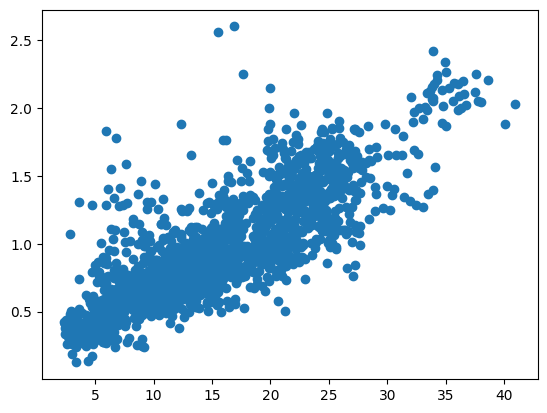

In [25]:
plt.scatter(df['tested_positive.2'], df['cli'])

In [34]:
error_state = []
for col in best_corr:
    rmse = np.sqrt((df['tested_positive.2'] - df['cli'])**2)
    th1 = rmse.mean() + 3*rmse.std()
    th2 = rmse.mean() -3*rmse.std()

    error_index = rmse[(rmse>th1)|(rmse<th2)].index
    error_state_col = df[df.index.isin(error_index)].iloc[:,:40].sum()
    error_state.append(error_state_col[error_state_col > 0])
pd.DataFrame(error_state).fillna(0).sum().sort_values(ascending=False)

ID    42
IA    28
dtype: int64

In [36]:
df[df['ID']==1].corr()['tested_positive.2'].sort_values(ascending=False).dropna()

tested_positive.2         1.000000
tested_positive.1         0.966926
tested_positive           0.927031
nohh_cmnty_cli            0.918324
nohh_cmnty_cli.1          0.914995
worried_become_ill.2      0.910807
nohh_cmnty_cli.2          0.909370
hh_cmnty_cli              0.904493
worried_become_ill.1      0.903989
hh_cmnty_cli.1            0.899749
worried_become_ill        0.896465
wearing_mask.1            0.894885
hh_cmnty_cli.2            0.894806
wearing_mask.2            0.889286
wearing_mask              0.888645
cli.1                     0.823223
cli.2                     0.822853
cli                       0.814988
ili                       0.805805
ili.1                     0.804959
ili.2                     0.798897
anxious                   0.645776
worried_finances.2        0.638682
worried_finances.1        0.638024
worried_finances          0.632134
anxious.1                 0.620713
anxious.2                 0.593426
felt_isolated.2           0.524350
felt_isolated.1     

In [37]:
def corrByState(df, y='tested_positive.2'):
    state_best_corr = {}
    for state in df.columns[:40]:
        state_corr = df[df[state]==1].iloc[:,40:].corr()[y].drop(y)
        state_best_corr[state] = state_corr[abs(state_corr)>0.85].sort_values(ascending=False)
    return state_best_corr

In [38]:
pd.DataFrame(corrByState(df))

,AL,AK,AZ,AR,CA,CO,CT,FL,GA,ID,...,OR,PA,RI,SC,TX,UT,VA,WA,WV,WI
anxious,NaN,NaN,NaN,NaN,NaN,NaN,0.876884,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anxious.1,NaN,NaN,NaN,NaN,NaN,NaN,0.876873,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anxious.2,NaN,NaN,NaN,NaN,NaN,NaN,0.868209,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cli,NaN,NaN,NaN,NaN,NaN,0.948963,0.883789,NaN,NaN,NaN,...,NaN,NaN,NaN,0.885565,NaN,NaN,NaN,NaN,NaN,NaN
cli.1,NaN,NaN,NaN,NaN,NaN,0.951948,0.913294,NaN,NaN,NaN,...,NaN,NaN,NaN,0.875970,NaN,NaN,NaN,NaN,NaN,NaN
cli.2,NaN,NaN,NaN,NaN,NaN,0.957638,0.933274,NaN,NaN,NaN,...,NaN,NaN,NaN,0.858307,NaN,NaN,NaN,NaN,NaN,NaN
depressed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depressed.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.854915,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depressed.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.856936,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hh_cmnty_cli,NaN,NaN,NaN,NaN,NaN,0.958053,0.906471,NaN,NaN,0.904493,...,NaN,NaN,NaN,0.926173,0.930062,NaN,0.911162,NaN,NaN,NaN


In [40]:
col_corr_count = pd.DataFrame(corrByState(df)).apply(lambda x: x.count(), axis=1).sort_values(ascending=False)
col_corr = col_corr_count[col_corr_count > 8]
col_corr

tested_positive.1       28
tested_positive         24
nohh_cmnty_cli.2        15
nohh_cmnty_cli.1        15
nohh_cmnty_cli          15
hh_cmnty_cli            15
hh_cmnty_cli.2          15
hh_cmnty_cli.1          14
cli.2                   11
spent_time              11
spent_time.2            10
spent_time.1            10
ili.2                   10
shop.2                  10
ili                      9
ili.1                    9
shop.1                   9
cli.1                    9
cli                      9
worried_become_ill.2     9
dtype: int64